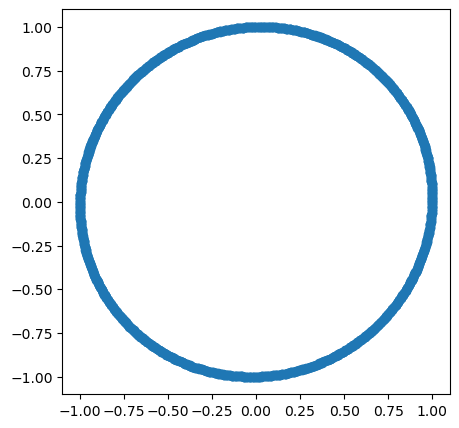

In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = np.zeros(1000)
q = np.zeros(1000)

p[0] = 1
q[0] = 0

dt = 0.05

for i in range(1, 1000):
    p[i] = p[i-1] - dt * q[i-1]
    #q[i] = q[i-1] + dt * p[i-1] # 欧拉法
    q[i] = q[i-1] + dt * p[i] # 辛算法

plt.figure(figsize=(5, 5))
plt.scatter(p, q)
plt.show()

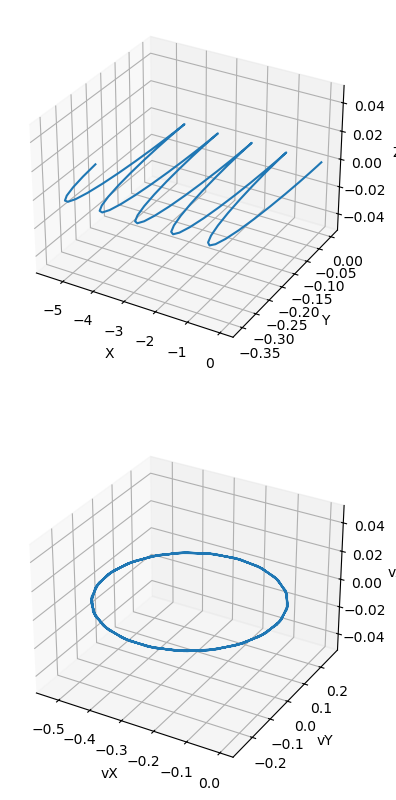

In [42]:

## Boris法
import numpy as np
import matplotlib.pyplot as plt

def E(x):
    return np.array([0, -0.4, 0])

def B(x):
    return np.array([0, 0, 1.5])

def boris(x_0, v_0, E, B, num=100000):
    x = np.zeros((num, 3))
    v = np.zeros((num, 3))
    u = np.zeros(3)

    dt = 0.2
    q = 1
    m = 1

    q_ = q * dt / (2 * m)
    
    ## 初始条件
    x[0] = x_0
    v[0] = v_0

    for i in range(1,num):
        h = B(x[i-1]) * q_
        s = 2*h/(1+np.dot(h, h))
        u = v[i-1] + q_ * E(x[i-1])
        u_ = u + np.cross((u + np.cross(u, h)), s)
        v[i] = u_ + q_ * E(x[i-1])
        x[i] = x[i-1] + v[i]*dt

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(211, projection='3d')
    ax.plot(x[:, 0], x[:, 1], x[:, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax2 = fig.add_subplot(212, projection='3d')
    ax2.plot(v[:, 0], v[:, 1], v[:, 2])
    ax2.set_xlabel('vX')
    ax2.set_ylabel('vY')
    ax2.set_zlabel('vZ')
    plt.show()

x_0 = np.array([0, 0, 0])
v_0 = np.array([0, 0, 0])
boris(x_0, v_0, E, B, 100)

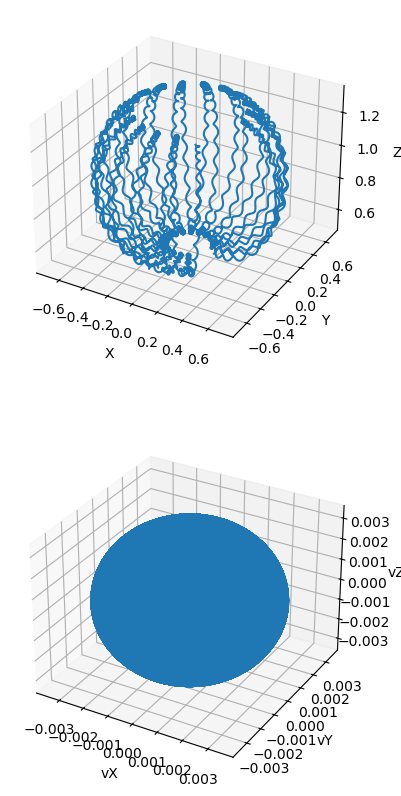

In [43]:
## 单匝线圈磁场
import numpy as np
import matplotlib.pyplot as plt

mu_0 = 4 * np.pi * 10**(-7)
I = 1e6
a = 0.2

def K(x):
    return 0.5 * np.pi * (1 + (1/2)**2*x**2 + (3/8)**2*x**4 + (5/16)**2*x**6)
def E(x):
    return 0.5 * np.pi * (1 - (1/2)**2*x**2 - (3/8)**2*x**4/3 - (5/16)**2*x**6/5)

def B(vec_r, a, I):
    x = vec_r[0]
    y = vec_r[1]
    z = vec_r[2]
    rho = np.sqrt(x**2 + y**2)
    k2 = 4*a*rho / ((a + rho)**2 + z**2)

    B_rho = mu_0 * I / (2 * np.pi * rho) * z / np.sqrt((a + rho)**2 + z**2) * ((a**2+rho**2+z**2)/((a-rho)**2+z**2) * E(k2) - K(k2))
    B_z = mu_0 * I / (2 * np.pi) / np.sqrt((a + rho)**2 + z**2) * ((a**2-rho**2-z**2)/((a-rho)**2+z**2) * E(k2) + K(k2))
    B_x = B_rho * x / rho
    B_y = B_rho * y / rho

    return np.array([B_x, B_y, B_z])

def B_dipole(vec_r, a, I, L):
    B1 = B(vec_r - np.array([0, 0, L/2]), a, I)
    B2 = B(vec_r + np.array([0, 0, L/2]), a, I)
    return B1 + B2

def B_earth(vec_r):
    B_0 = 3.07e-5
    R_e = 6371e3
    x = vec_r[0]
    y = vec_r[1]
    z = vec_r[2]

    B_0_ = -B_0 * R_e**3 / np.linalg.norm(vec_r)**5
    B_x = B_0_ * 3 * x * z
    B_y = B_0_ * 3 * y * z
    B_z = B_0_ * (2 * z**2 - x**2 - y**2)
    return np.array([B_x, B_y, B_z])

def q(r):
    q1 = 0.5
    q2 = 0.1
    q3 = 0.01
    return q1 + q2*r + q3*r**2

def B_tokamak(vec_r, R_0, B_0):
    x = vec_r[0]
    y = vec_r[1]
    z = vec_r[2]
    R = np.sqrt(x**2 + y**2)
    r = np.sqrt((R-R_0)**2 + z**2)
    B_t = B_0*R_0/R
    B_p = B_t*r/(q(r)*R_0)
    B_x = B_t*(-y)/R - B_p*z/r*x/R
    B_y = B_t*x/R - B_p*z/r*y/R
    B_z = -B_p*z/r*(R-R_0)/r

def E_target(vec_r):
    return np.array([0, 0, 0])
B_target = lambda x: B_dipole(x, a, I, 2)

x_0 = np.array([0.2, 0, 0.5])
v_0 = np.array([0.002, 0.002, 0.002])

boris(x_0, v_0, E_target, B_target)
